In [17]:
# Dependencies and Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
import plotly.express as px

In [18]:
#Data Files
Wages_by_Education_file = Path("wages_by_education.csv")

# Read CSV File
df = pd.read_csv (Wages_by_Education_file)
df.head()

,year,less_than_hs,high_school,some_college,bachelors_degree,advanced_degree,men_less_than_hs,men_high_school,men_some_college,men_bachelors_degree,...,black_women_less_than_hs,black_women_high_school,black_women_some_college,black_women_bachelors_degree,black_women_advanced_degree,hispanic_women_less_than_hs,hispanic_women_high_school,hispanic_women_some_college,hispanic_women_bachelors_degree,hispanic_women_advanced_degree
0,2022,16.52,21.94,24.81,41.60,53.22,17.99,24.08,27.96,49.01,...,13.89,17.83,20.36,29.94,39.41,14.74,18.18,20.64,31.13,40.64
1,2021,16.74,22.28,24.92,41.32,53.45,18.34,24.36,27.96,47.83,...,13.73,18.30,20.18,29.35,40.07,14.97,18.34,21.14,31.25,42.47
2,2020,17.02,22.70,25.44,41.65,53.74,18.76,25.09,28.55,48.15,...,13.66,17.93,20.31,31.38,42.44,14.58,18.50,20.69,31.55,44.15
3,2019,16.11,21.64,24.00,39.61,51.57,17.55,23.99,26.99,45.74,...,13.30,17.18,19.17,30.31,40.42,14.50,17.71,19.69,30.18,42.30
4,2018,15.94,21.50,23.70,38.87,51.03,17.70,23.72,26.61,44.97,...,12.48,16.81,18.57,30.85,39.64,13.47,17.28,19.29,29.47,39.35


In [19]:
#Display column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             50 non-null     int64  
 1   less_than_hs                     50 non-null     float64
 2   high_school                      50 non-null     float64
 3   some_college                     50 non-null     float64
 4   bachelors_degree                 50 non-null     float64
 5   advanced_degree                  50 non-null     float64
 6   men_less_than_hs                 50 non-null     float64
 7   men_high_school                  50 non-null     float64
 8   men_some_college                 50 non-null     float64
 9   men_bachelors_degree             50 non-null     float64
 10  men_advanced_degree              50 non-null     float64
 11  women_less_than_hs               50 non-null     float64
 12  women_high_school       

QUESTION 1 - •	Are things trending towards females earning as much as males for those with an advanced degree?

In [22]:
df_gender = df.iloc[:, [0, 10, 15]]
df_gender.head()

,year,men_advanced_degree,women_advanced_degree
0,2022,63.51,44.34
1,2021,63.52,44.80
2,2020,62.70,46.04
3,2019,59.93,44.22
4,2018,59.73,43.19


In [23]:
df_gender.columns

Index(['year', 'men_advanced_degree', 'women_advanced_degree'], dtype='object')

In [24]:
fig = px.line(df_gender, x = "year", y = df_gender.columns,title = "Hourly Wage vs Education (1973-2022)")
fig.update_layout(xaxis_title = "Years", yaxis_title = "Hourly Wage", legend_title = "Gender")
fig.show()

In [25]:
#Unpivot the dataset only looking at advanced degrees by gender
df_unpivoted = df_gender.melt(id_vars='year', var_name = 'gender', value_name = 'salary')
df_unpivoted.head()

,year,gender,salary
0,2022,men_advanced_degree,63.51
1,2021,men_advanced_degree,63.52
2,2020,men_advanced_degree,62.70
3,2019,men_advanced_degree,59.93
4,2018,men_advanced_degree,59.73


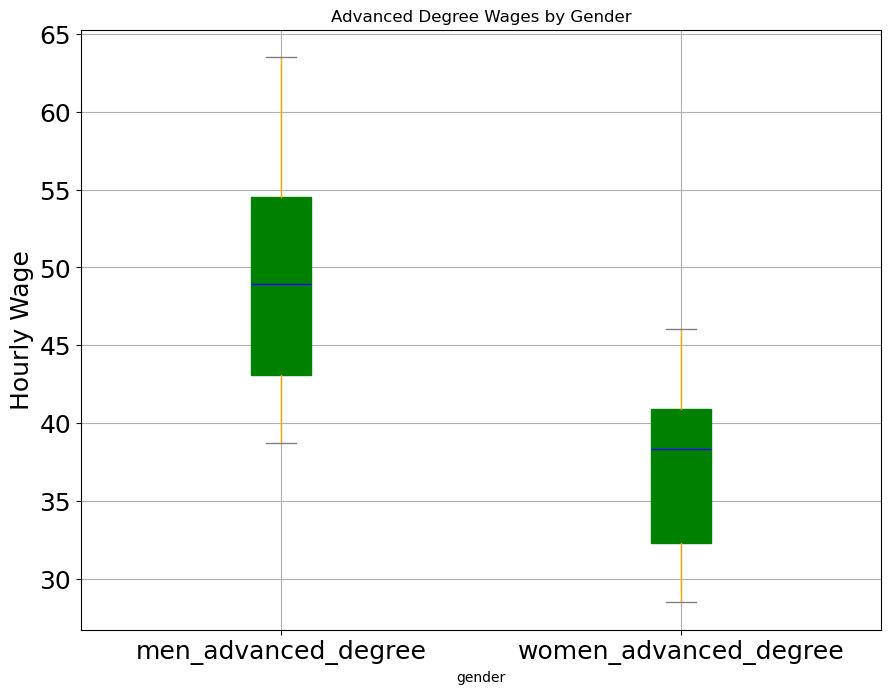

In [26]:
#Color of boxplots
props = dict(boxes="Green", whiskers="Orange", medians="Blue", caps="Gray")

#Create Boxplot
df_unpivoted.boxplot("salary", by="gender", figsize=(10, 8),fontsize=18,color=props,patch_artist=True)

#Labels on Boxplot
plt.title('Advanced Degree Wages by Gender',fontsize=12)
plt.suptitle('')
plt.ylabel('Hourly Wage',fontsize=18)

plt.show()

In [27]:
# Extract individual groups
group0 = df_unpivoted[df_unpivoted["gender"] == 'men_advanced_degree']["salary"]
group1 = df_unpivoted[df_unpivoted["gender"] == 'women_advanced_degree']["salary"]

In [28]:
# Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=98.95882314672339, pvalue=1.5709388132185287e-16)

In [29]:
#Run ttest against men_advanced_degree vs women_advanced_degree
stats.ttest_ind(group0, group1, equal_var=False)

TtestResult(statistic=9.947804941127643, pvalue=4.1822362231788787e-16, df=88.83363786823676)

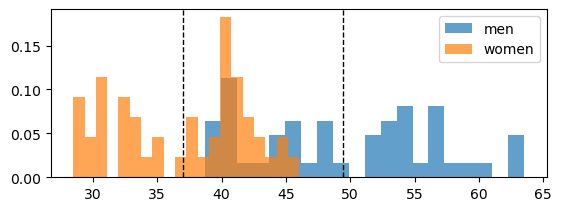

In [30]:
plt.subplot(2, 1, 2)
plt.hist(group0, 20, density=True, alpha = 0.7, label = 'men')
plt.hist(group1, 20, density=True, alpha = 0.7, label = 'women')
plt.axvline(group0.mean(), color ='k', linestyle='dashed', linewidth=1)
plt.axvline(group1.mean(), color ='k', linestyle='dashed', linewidth=1)
plt.legend()

QUESITON 2 - •	Does the increase in education affect the increase in salary for both men and women equally?

QUESTION 3 - •	For those with an advanced degree, is there a difference between one of the groups based on race for the last 5 years?